In [1]:
import pandas as pd
import os

def load_trading_data(data_folder: str) -> dict[str, pd.DataFrame]:
    """
    Load trading data from CSV files into pandas DataFrames.

    Args:
        data_folder (str): Path to the folder containing the CSV files

    Returns:
        Dict[str, pd.DataFrame]: Dictionary containing the following DataFrames:
            - 'prices': Price data for all days
            - 'trades': Trade data for all days
    """
    data = {
        'prices': [],
        'trades': [],
        'observations': []
    }

    # Load data for each day
    for day in [1, 2, 3]:
        # Load price data
        price_file = os.path.join(data_folder, f'prices_round_4_day_{day}.csv')
        if os.path.exists(price_file):
            price_df = pd.read_csv(price_file, sep=';')
            # Add day column
            price_df['day'] = day
            # Convert timestamp if it exists
            if 'timestamp' in price_df.columns:
                price_df = price_df.sort_values('timestamp')
            data['prices'].append(price_df)

        # Load trade data
        trade_file = os.path.join(data_folder, f'trades_round_4_day_{day}.csv')
        if os.path.exists(trade_file):
            trade_df = pd.read_csv(trade_file, sep=';')
            trade_df['day'] = day
            if 'timestamp' in trade_df.columns:
                trade_df = trade_df.sort_values('timestamp')
            data['trades'].append(trade_df)

        # Load observation data
        observation_file = os.path.join(data_folder, f'observations_round_4_day_{day}.csv')
        if os.path.exists(observation_file):
            observation_df = pd.read_csv(observation_file, sep=',')
            observation_df['day'] = day
            if 'timestamp' in observation_df.columns:
                observation_df = observation_df.sort_values('timestamp')
            data['observations'].append(observation_df)

    # Concatenate all days' data
    result = {}
    for key, dfs in data.items():
        if dfs:  # Only add if we found any data
            result[key] = pd.concat(dfs, ignore_index=True)

    return result

def get_product_data(df: pd.DataFrame, product: str) -> pd.DataFrame:
    """
    Filter DataFrame for a specific product.

    Args:
        df (pd.DataFrame): DataFrame containing trading data
        product (str): Product name to filter for

    Returns:
        pd.DataFrame: Filtered DataFrame containing only data for the specified product
    """
    return df[df['product'] == product]

def get_day_data(df: pd.DataFrame, day: int) -> pd.DataFrame:
    """
    Filter DataFrame for a specific day.

    Args:
        df (pd.DataFrame): DataFrame containing trading data
        day (int): Day number to filter for

    Returns:
        pd.DataFrame: Filtered DataFrame containing only data for the specified day
    """
    return df[df['day'] == day]

def get_product_day_data(df: pd.DataFrame, product: str, day: int) -> pd.DataFrame:
    """
    Filter DataFrame for a specific product and day.

    Args:
        df (pd.DataFrame): DataFrame containing trading data
        product (str): Product name to filter for
        day (int): Day number to filter for

    Returns:
        pd.DataFrame: Filtered DataFrame containing only data for the specified product and day
    """
    return df[(df['product'] == product) & (df['day'] == day)]

def get_price_data(df: pd.DataFrame, product: str = None, day: int = None) -> pd.DataFrame:
    """
    Get price data with optional filtering by product and/or day.

    Args:
        df (pd.DataFrame): DataFrame containing price data
        product (str, optional): Product name to filter for
        day (int, optional): Day number to filter for

    Returns:
        pd.DataFrame: Filtered price data
    """
    result = df.copy()
    if product:
        result = result[result['product'] == product]
    if day:
        result = result[result['day'] == day]
    if 'timestamp' in result.columns:
        result = result.sort_values('timestamp')
    return result

def get_order_book_data(df: pd.DataFrame, product: str = None, day: int = None) -> pd.DataFrame:
    """
    Get order book data with optional filtering by product and/or day.

    Args:
        df (pd.DataFrame): DataFrame containing price data
        product (str, optional): Product name to filter for
        day (int, optional): Day number to filter for

    Returns:
        pd.DataFrame: Filtered order book data
    """
    result = df.copy()
    if product:
        result = result[result['product'] == product]
    if day:
        result = result[result['day'] == day]
    if 'timestamp' in result.columns:
        result = result.sort_values('timestamp')
    return result

def get_volume_data(df: pd.DataFrame, product: str = None, day: int = None) -> pd.DataFrame:
    """
    Get volume data with optional filtering by product and/or day.

    Args:
        df (pd.DataFrame): DataFrame containing trade data
        product (str, optional): Product name to filter for
        day (int, optional): Day number to filter for

    Returns:
        pd.DataFrame: Filtered volume data
    """
    result = df.copy()
    if product:
        result = result[result['product'] == product]
    if day:
        result = result[result['day'] == day]
    if 'timestamp' in result.columns:
        result = result.sort_values('timestamp')
    return result

def convert_timestamp(df: pd.DataFrame) -> pd.DataFrame:
    return df.assign(t=(df['day'] - 1) * 1_000_000 + df['timestamp']).drop(columns=['day', 'timestamp'])

In [2]:
trading_data = load_trading_data('round-4-island-data-bottle')

In [3]:
price_df = trading_data['prices']
price_df = convert_timestamp(price_df)
price_df

,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,t
0,VOLCANIC_ROCK,10515.0,143.0,10514.0,57.0,NaN,NaN,10517,200,NaN,NaN,NaN,NaN,10516.0,0.0,0
1,DJEMBES,13409.0,61.0,NaN,NaN,NaN,NaN,13410,27,13411.0,34.0,NaN,NaN,13409.5,0.0,0
2,VOLCANIC_ROCK_VOUCHER_10000,517.0,12.0,NaN,NaN,NaN,NaN,518,12,NaN,NaN,NaN,NaN,517.5,0.0,0
3,JAMS,6541.0,237.0,NaN,NaN,NaN,NaN,6543,237,NaN,NaN,NaN,NaN,6542.0,0.0,0
4,KELP,2032.0,23.0,NaN,NaN,NaN,NaN,2035,23,NaN,NaN,NaN,NaN,2033.5,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,DJEMBES,13372.0,23.0,13371.0,42.0,NaN,NaN,13373,65,NaN,NaN,NaN,NaN,13372.5,0.0,2999900
449996,MAGNIFICENT_MACARONS,794.0,12.0,791.0,18.0,785.0,23.0,802,6,810.0,23.0,816.0,18.0,798.0,0.0,2999900
449997,VOLCANIC_ROCK,9920.0,137.0,9919.0,69.0,NaN,NaN,9921,131,9922.0,69.0,NaN,NaN,9920.5,0.0,2999900
449998,KELP,2037.0,25.0,NaN,NaN,NaN,NaN,2040,25,NaN,NaN,NaN,NaN,2038.5,0.0,2999900


In [4]:
observation_df = trading_data['observations']
observation_df = convert_timestamp(observation_df)
observation_df

,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex,t
0,627.0,628.5,1.0,9.0,-3.0,200.000000,60.00,0
1,630.0,631.5,1.0,9.0,-3.0,200.098445,60.00,100
2,630.0,631.5,1.0,9.0,-3.0,200.103915,60.00,200
3,632.0,633.5,1.0,9.0,-3.0,200.352462,60.01,300
4,630.5,632.0,1.0,9.0,-3.0,200.201545,60.01,400
...,...,...,...,...,...,...,...,...
29995,797.5,799.0,1.7,9.5,-5.5,212.124918,54.95,2999500
29996,801.5,803.0,1.7,9.5,-5.5,212.147650,54.96,2999600
29997,804.0,805.5,1.7,9.5,-5.5,212.202086,54.97,2999700
29998,798.5,800.0,1.7,9.5,-5.5,212.112734,54.98,2999800


In [5]:
df = price_df.pivot(index='t', columns='product', values='mid_price').join(observation_df.set_index('t').drop(['bidPrice', 'askPrice'], axis=1))
df

,CROISSANTS,DJEMBES,JAMS,KELP,MAGNIFICENT_MACARONS,PICNIC_BASKET1,PICNIC_BASKET2,RAINFOREST_RESIN,SQUID_INK,VOLCANIC_ROCK,VOLCANIC_ROCK_VOUCHER_10000,VOLCANIC_ROCK_VOUCHER_10250,VOLCANIC_ROCK_VOUCHER_10500,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex
t,,,,,,,,,,,,,,,,,,,,
0,4275.0,13409.5,6542.0,2033.5,627.5,58710.5,30255.0,10000.0,1836.0,10516.0,517.5,279.5,95.5,1016.0,766.5,1.0,9.0,-3.0,200.000000,60.00
100,4275.5,13409.0,6542.0,2034.5,630.5,58710.5,30257.5,10000.0,1838.5,10515.0,516.5,278.5,94.5,1015.5,765.5,1.0,9.0,-3.0,200.098445,60.00
200,4275.5,13409.5,6542.5,2033.5,630.5,58711.5,30258.5,10004.5,1840.5,10515.0,516.5,278.5,94.5,1015.5,765.5,1.0,9.0,-3.0,200.103915,60.00
300,4275.5,13409.0,6542.0,2034.5,632.5,58710.5,30259.0,10004.5,1843.5,10517.0,519.5,280.5,95.5,1017.5,767.5,1.0,9.0,-3.0,200.352462,60.01
400,4274.5,13410.5,6541.0,2033.5,631.5,58703.5,30258.0,9997.5,1843.5,10519.5,521.5,282.5,97.5,1019.5,770.5,1.0,9.0,-3.0,200.201545,60.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999500,4294.5,13371.5,6446.5,2038.5,798.0,58327.5,30125.0,10000.0,1929.5,9916.0,34.5,2.5,1.0,417.5,181.5,1.7,9.5,-5.5,212.124918,54.95
2999600,4294.5,13372.0,6446.5,2038.5,802.0,58326.0,30127.0,10000.0,1929.5,9917.0,30.5,2.5,1.0,418.5,182.5,1.7,9.5,-5.5,212.147650,54.96
2999700,4295.5,13371.5,6446.0,2038.0,805.0,58322.5,30126.0,10000.0,1928.0,9917.5,34.5,2.5,1.0,419.5,182.5,1.7,9.5,-5.5,212.202086,54.97


In [6]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plot_df = df[['MAGNIFICENT_MACARONS', 'sunlightIndex', 'sugarPrice', 'transportFees', 'exportTariff', 'importTariff']]

# Get unique products (columns of the DataFrame)
products = plot_df.columns
n_products = len(products)

# Create subplots, one for each product
fig = make_subplots(rows=n_products, cols=1, 
                    subplot_titles=[f'Price Trend - {product}' for product in products],
                    vertical_spacing=0.05)

# Create a line plot for each product
for idx, product in enumerate(products, start=1):
    fig.add_trace(
        go.Scatter(
            x=plot_df.index,  # Time is the index
            y=plot_df[product],  # Price data for the product
            name=product,
            mode='lines',
            hovertemplate='Time: %{x}<br>Price: %{y}<extra></extra>'
        ),
        row=idx,
        col=1
    )

# Update layout for better visualization
fig.update_layout(
    height=300 * n_products,  # Adjust height based on number of products
    title_text='Price Trends by Product',
    showlegend=True,
    hovermode='x unified'
)

# Update x-axes to be uniform
fig.update_xaxes(title_text='Time')

# Update y-axes labels
fig.update_yaxes(title_text='Price')

# Show the plot
fig.show()

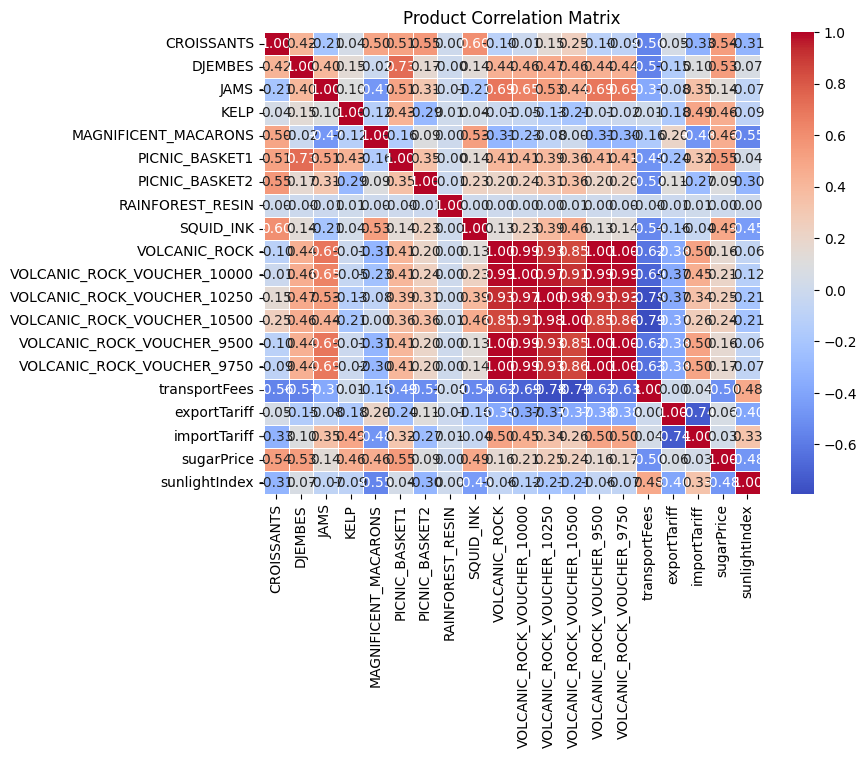

sunlightIndex                  0.552071
SQUID_INK                      0.530388
CROISSANTS                     0.501561
importTariff                   0.479329
JAMS                           0.466479
sugarPrice                     0.455956
VOLCANIC_ROCK                  0.309008
VOLCANIC_ROCK_VOUCHER_9500     0.308415
VOLCANIC_ROCK_VOUCHER_9750     0.300520
VOLCANIC_ROCK_VOUCHER_10000    0.231381
exportTariff                   0.203505
transportFees                  0.163045
PICNIC_BASKET1                 0.159001
KELP                           0.120559
PICNIC_BASKET2                 0.091477
VOLCANIC_ROCK_VOUCHER_10250    0.082525
DJEMBES                        0.018522
RAINFOREST_RESIN               0.003964
VOLCANIC_ROCK_VOUCHER_10500    0.003425
Name: MAGNIFICENT_MACARONS, dtype: float64


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Product Correlation Matrix')
plt.show()

# Print the products with the highest absolute correlation with MAGNIFICENT_MACARONS
print(correlation_matrix['MAGNIFICENT_MACARONS'].abs().sort_values(ascending=False).drop('MAGNIFICENT_MACARONS'))

In [8]:
df.columns

Index(['CROISSANTS', 'DJEMBES', 'JAMS', 'KELP', 'MAGNIFICENT_MACARONS',
       'PICNIC_BASKET1', 'PICNIC_BASKET2', 'RAINFOREST_RESIN', 'SQUID_INK',
       'VOLCANIC_ROCK', 'VOLCANIC_ROCK_VOUCHER_10000',
       'VOLCANIC_ROCK_VOUCHER_10250', 'VOLCANIC_ROCK_VOUCHER_10500',
       'VOLCANIC_ROCK_VOUCHER_9500', 'VOLCANIC_ROCK_VOUCHER_9750',
       'transportFees', 'exportTariff', 'importTariff', 'sugarPrice',
       'sunlightIndex'],
      dtype='object')

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

X_cols = [col for col in df.columns if col != 'MAGNIFICENT_MACARONS']
X = df[X_cols]
y = df['MAGNIFICENT_MACARONS']

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]